In [13]:
import matplotlib.pyplot as plt
from konlpy.tag import Hannanum
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.keys import Keys
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud

url 입력 :  watch?v=vGJXAJlZZOw
스크롤할 횟수 (1~50) :  10


{'수': 21, '저': 15, '생각': 13, '것': 12, '북한': 12, '우리': 11, '전쟁': 10, '일': 7, '당시': 7, '우리나라': 6, '대': 5, '포탄': 5, '기억': 5, '정도': 5, '유서': 5, '나': 5, '소리': 5, '식': 5, '방공호': 4, '존': 4, '때': 4, '군인': 4, '뉴스': 4, '라': 4, '들': 4, '최전방': 4, '분대원들': 4, '이': 3, '포격도발': 3, '대대장님': 3, '집합': 3, '병사들': 3, '전원': 3, '분대장들': 3, '앞': 3, '생활관': 3, '방탄조끼': 3, '전': 3, '봉투': 3, '태극기': 3, '웃음': 3, '얘': 3, '처음': 3, '8월': 3, '대한민국': 3, '전쟁나': 3, '부대': 3, '도발': 3, '진짜': 3, '집': 3, '부모님': 3, '약': 3, '이후': 3, '군': 3, '지': 3, '후': 3, '사건': 3, '육군': 3, '후퇴': 3, '훈련': 3, '통신장비': 3, '확신': 3, '전방': 2, '지뢰도발': 2, '대기': 2, '대피': 2, '중대장님': 2, '말씀': 2, '방탄': 2, '2명': 2, '데': 2, '팀원들': 2, '무전': 2, '소대': 2, '거미': 2, '막사': 2, '대북방송': 2, '매복': 2, '몇일': 2, '전시임무': 2, '투입': 2, '수류탄': 2, '위장크림': 2, '종이': 2, '오성산': 2, '마지막': 2, '화장실': 2, '마음': 2, '15년': 2, '적': 2, '군대': 2, '형': 2, '땅': 2, '입대': 2, '천안함': 2, '연평도': 2, '동기': 2, '1명': 2, '휴가': 2, '유서쓰': 2, '오늘': 2, '자랑': 2, '실상황': 2, '평소': 2, '상태': 2, '불평불만': 2, '이전': 2, '내': 2, 

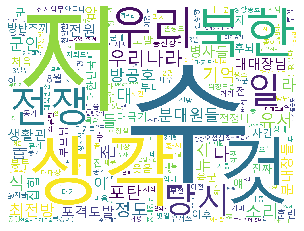

In [14]:
#유튜브 url 가져오기
url = input('url 입력 : ')
url = 'https://www.youtube.com/'+url
#폰트
font_path_input = 'C:/Windows/Fonts/malgun.ttf'
#가져올 댓글 스크롤
num_scroll = int(input('스크롤할 횟수 (1~50) : '))

#유튜브 크롤링
browser = webdriver.Chrome(r"C:\chromedriver.exe")
browser.get(url)
#너무 빠르게 하면 오류가 날 수도 있으니깐 기다려주기
browser.implicitly_wait(2)

#body태그 다 가져오기
body = browser.find_element_by_tag_name('body')

#id, content, likes 리스트
yt_id = []
yt_content = []
yt_likes = []

#스크롤 내리기
while num_scroll:
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.3)
    num_scroll -= 1

#html을 파싱하고 브라우저 닫기
html0 = browser.page_source
html = BeautifulSoup(html0, 'html.parser')
browser.close()


result = html.find_all("div", id='main')

#id, contet, lies에 저장
for i in result:
    i = BeautifulSoup(str(i), 'html.parser')
    try:
        yt_id.append(i.find('a', id='author-text').text)
        yt_content.append(i.find('div', id='content').text)
        yt_likes.append(i.find('span', id='vote-count-middle').text)
    except:
        print('Exception!!!!!!!!!')


#데이터 프레임화
df = pd.DataFrame({'id': yt_id, 'content': yt_content, 'likes': yt_likes})
df.to_csv('youtube_crawling.csv', mode='w', encoding='utf-8-sig')

#하나의 글로 합치기
texts = ''
for i in list(df['content']):
    texts += i

#이모티콘 제외하기
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# 분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

comment_result = []
str_result = ''
for i in texts:
    tokens = re.sub(emoji_pattern, "", i)
    tokens = re.sub(han, "", tokens)
    str_result += tokens
    comment_result.append(tokens)

#hannanum을 이용해서 명사만 뽑아오기
hannanum = Hannanum()
noun_words = list(hannanum.nouns(str_result))

#명사들의 개수 세서 내림차순으로 정렬
count = Counter(noun_words)
words = dict(count.most_common())
print(words)

#wordcloud로 시각화
words_ = words
words_save = pd.DataFrame(words_, index=[0])
words_save.to_csv("youtube_crawling_words.csv", mode='w', encoding='utf-8-sig')

wordcloud = WordCloud(font_path=font_path_input, background_color='white', width=1600, height=1200)
cloud = wordcloud.generate_from_frequencies(words)
plt.imshow(cloud)
plt.axis('off')
plt.show()
#watch?v=fRN1uB5hLrI
#watch?v=vGJXAJlZZOw